# Comment Processing 01

### Comment Count

In a first attempt to interpret the comment data retrieved from our data retrieveal we want to count what speaker/party has most comments on their speeches.

---


In [19]:
import pandas as pd
from util.getComments import getComments
import matplotlib.pyplot as plt
from tueplots import bundles


In [20]:
%store -r dataExtracted
dataExtracted: pd.DataFrame
dataExtracted.head()


,sentences,main-speaker,main-speaker-party
0,"[{'speech': 'Guten Morgen, liebe Kolleginnen u...",Hermann Otto Solms,Freie Demokratische Partei
1,[{'speech': 'Herr Präsident! Liebe Kolleginnen...,Jan Korte,Die Linke
2,[{'speech': 'Herr Präsident! Sehr verehrte Gäs...,Michael Grosse-Brömer,Christlich Demokratische Union Deutschlands
3,[{'speech': 'Sehr geehrter Herr Präsident! Mei...,Britta Haßelmann,Bündnis 90/Die Grünen
4,"[{'speech': 'Wir kommen nun zur Abstimmung.'},...",Hermann Otto Solms,Freie Demokratische Partei


In [21]:
# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 150})
# Use neurips style
plt.rcParams.update(bundles.neurips2021())


In [22]:
speakers = dataExtracted["main-speaker"].unique()
commentCountPerSpeaker = [
    len(getComments(dataExtracted, speakerFilter=speaker)) for speaker in speakers]

speakersDF = pd.DataFrame(
    data={"speaker": speakers, "comment count": commentCountPerSpeaker})
speakersDF


,speaker,comment count
0,Hermann Otto Solms,2
1,Jan Korte,9
2,Michael Grosse-Brömer,23
3,Britta Haßelmann,17
4,Wolfgang Schäuble,0
5,Jan Nolte,11
6,Tobias Lindner,9
7,Jürgen Hardt,4
8,Norbert Kleinwächter,15
9,Michael Georg Link,6


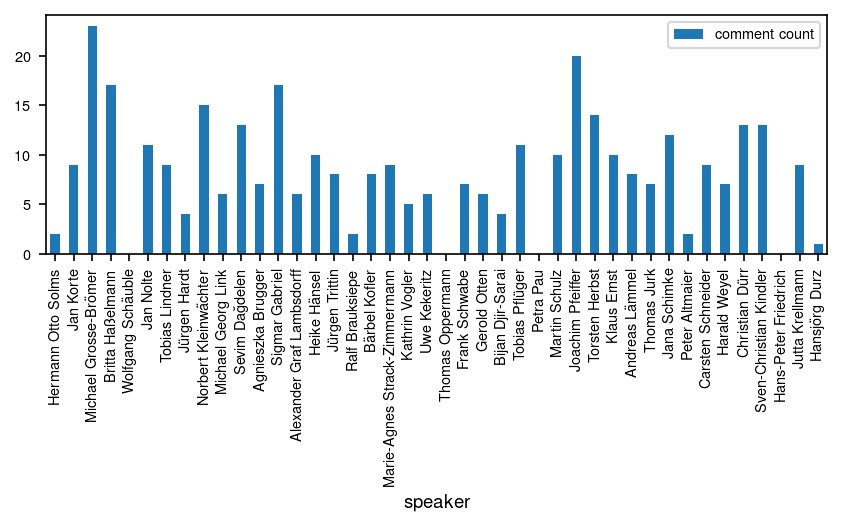

In [23]:
speakersDF.plot.bar(x="speaker", y="comment count")


In [24]:
parties = dataExtracted["main-speaker-party"].unique()
commentCountPerParty = [
    len(getComments(dataExtracted, partyFilter=party)) for party in parties]

partiesDF = pd.DataFrame(
    data={"party": parties, "comment count": commentCountPerParty})
partiesDF


,party,comment count
0,Freie Demokratische Partei,54
1,Die Linke,67
2,Christlich Demokratische Union Deutschlands,71
3,Bündnis 90/Die Grünen,60
4,Alternative für Deutschland,39
5,Sozialdemokratische Partei Deutschlands,58
6,Christlich-Soziale Union in Bayern,1


Text(0, 0.5, 'comment count')

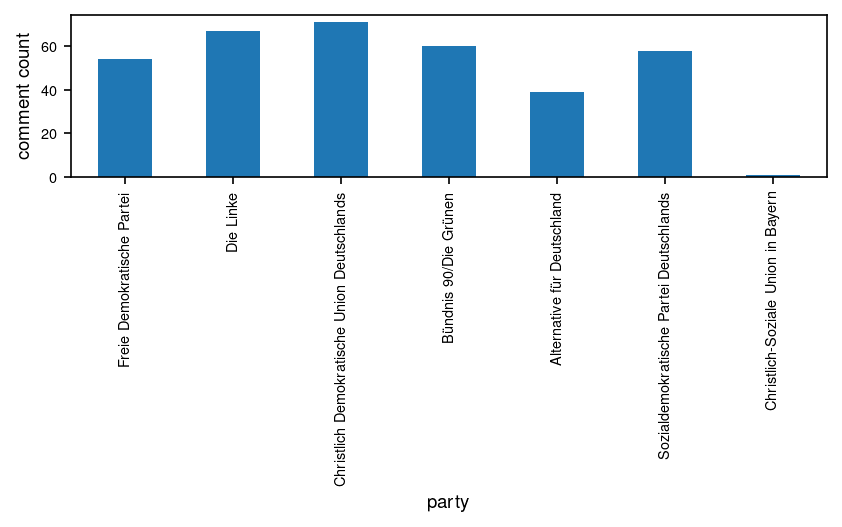

In [25]:
ax = partiesDF.plot.bar(x="party", y="comment count", legend=False)
ax.set_ylabel("comment count")